#


Gruppe 21, 

In [1]:
from secrets import token_bytes
import numpy as np
import pandas as pd
import nltk
import re
import nltk
from matplotlib import pyplot as plt 

In [2]:
df_load = pd.read_csv("https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv", delimiter=",")

In [3]:
df = df_load.copy()

def clean_text(txt):
  txt = txt.lower()
  txt = re.sub(r"\s+", " ", txt)
  regex = {"DATE" : r"(\d+[\\/-])?\d+[\\/-]\d+",
      "EMAIL" : r"\w+@\w+\.[a-z]{2,}",
      "URL" : r"([a-z\d]+://)?[a-z]+[a-z\d]*(\.[a-z\d\-\._~]+)+(/[a-z\d\-\._~]*|(\?[a-z\d\-\._~]+=[a-z\d\-\._~]+))*",
      "NUM" : r"[+-]?((\d+(,|\.))*\d+)"}
  for k in regex.keys():
    txt = re.sub(regex[k], k, txt) 
  return txt

def tokenize(txt):
  tokens = nltk.word_tokenize(txt)
  prepostfix = lambda t: "<"+t+">" if t.isupper() else t
  return list(map(prepostfix, tokens))

In [92]:
df = df.dropna(subset =["type"])

df_content = df["content"]
df_cleaned = df_content.apply(clean_text)
df_token = df_cleaned.apply(tokenize)

df["tokens"] = df_token

Unnamed: 0                                                          2
id                                                                700
domain                                                    cnnnext.com
type                                                       unreliable
url                 http://www.cnnnext.com/video/18526/never-hike-...
content             Never Hike Alone: A Friday the 13th Fan Film U...
scraped_at                                 2018-01-25 16:17:44.789555
inserted_at                                2018-02-02 01:19:41.756632
updated_at                                 2018-02-02 01:19:41.756664
title               Never Hike Alone - A Friday the 13th Fan Film ...
authors                                                           NaN
keywords                                                          NaN
meta_keywords                                                    ['']
meta_description    Never Hike Alone: A Friday the 13th Fan Film  ...
tags                

# Task 3 

In [109]:
# Function which returns list of token counts [URL, NUM, DATA, EMAIL, ALL_tokens]
def count_tokens(tokens):
    meta_tokens  = ["<URL>", "<NUM>", "<DATE>", "<EMAIL>"]
    meta_counts = [0, 0, 0, 0]
    for token in tokens:
      if token in meta_tokens:
        i = meta_tokens.index(token)
        meta_counts[i] += 1
    token_count = len(tokens)
    return [token_count] + meta_counts


# Observation 1 - relationship between type and tokencount (length of article)
def type_token_relation(df):
    counts = df["tokens"].apply(count_tokens)
    tokens = counts.apply(lambda xs: xs[0])
    tokens = tokens.rename("token_count")
    df_temp = pd.concat([df["type"], tokens], axis=1)

    df_ret = pd.DataFrame(index = df.index)
    types = df_temp["type"].unique()
    for t in types:
        df_ret[t] = df_temp[df_temp["type"] == t]["token_count"]
        pd.concat([df_ret, df_ret[t]], axis=1, ignore_index = True) 

    df_ret.boxplot()

    return df_ret.mean(axis=0)

# Observation 2 - relationship between type and URL frequency
def type_URLfreq_relation(df):
    counts = df["tokens"].apply(count_tokens)
    url_freq = counts.apply(lambda xs: xs[1]/xs[0])
    url_freq = url_freq.rename("url_freq")
    df_temp = pd.concat([df["type"], url_freq], axis=1)

    df_ret = pd.DataFrame(index = df.index)
    types = df_temp["type"].unique()
    for t in types:
        df_ret[t] = df_temp[df_temp["type"] == t]["url_freq"]
        pd.concat([df_ret, df_ret[t]], axis=1, ignore_index = True) 

    df_ret.boxplot()

    return df_ret.mean(axis=0)

# Observation 3 - type distribution of dataset
def type_distribution(df):
    df['type'].value_counts().plot.bar()
    return df['type'].value_counts()

# Observation 4 - types of article each domain publishes
def domain_type_relation(df):
    domains = df["domain"].unique()
    types = []
    for domain in domains:
        types.append(df[df["domain"] == domain]["type"].value_counts().to_dict())
    idx = sorted(range(len(types)), key=lambda i: list(types[i].items())[0][1])
    return list(map(lambda i: (domains[i], types[i]), reversed(idx)))

unreliable     361.666667
fake           769.554839
clickbait      329.000000
conspiracy     938.225806
reliable       530.666667
bias           520.833333
hate            67.000000
junksci        415.000000
political      756.086957
unknown       2730.000000
dtype: float64

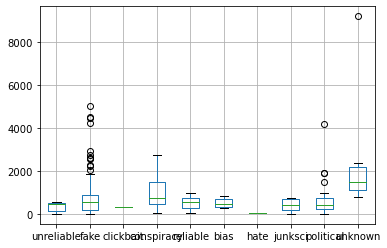

In [110]:
type_token_relation(df)

unreliable    0.007411
fake          0.004505
clickbait     0.000000
conspiracy    0.003574
reliable      0.001008
bias          0.005705
hate          0.000000
junksci       0.013840
political     0.002906
unknown       0.001769
dtype: float64

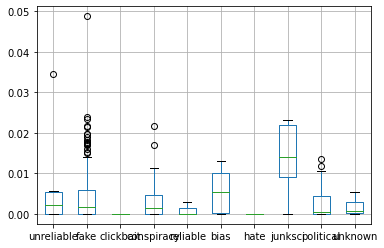

In [111]:
type_URLfreq_relation(df)

fake          155
conspiracy     31
political      23
unreliable      6
bias            6
junksci         6
unknown         6
reliable        3
clickbait       1
hate            1
Name: type, dtype: int64

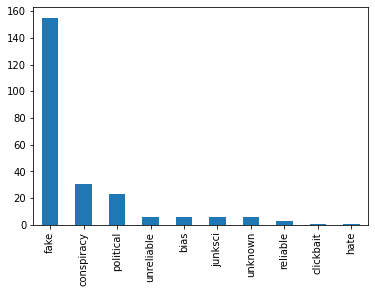

In [112]:
type_distribution(df)

In [113]:
domain_type_relation(df)

[('beforeitsnews.com', {'fake': 155}),
 ('canadafreepress.com', {'conspiracy': 24}),
 ('washingtonexaminer.com', {'political': 17}),
 ('awarenessact.com', {'conspiracy': 6}),
 ('naturalnews.com', {'junksci': 5}),
 ('strategic-culture.org', {'unknown': 4}),
 ('christianpost.com', {'reliable': 3}),
 ('city-journal.org', {'political': 2}),
 ('vdare.com', {'bias': 2}),
 ('undergroundhealth.com', {'unknown': 2}),
 ('alternet.org', {'political': 2}),
 ('awm.com', {'unreliable': 2}),
 ('breitbart.com', {'political': 1}),
 ('anonhq.com', {'unreliable': 1}),
 ('americanlookout.com', {'bias': 1}),
 ('washingtonsblog.com', {'bias': 1}),
 ('21stcenturywire.com', {'conspiracy': 1}),
 ('unz.com', {'bias': 1}),
 ('nationalreview.com', {'political': 1}),
 ('collectivelyconscious.net', {'junksci': 1}),
 ('breakpoint.org', {'unreliable': 1}),
 ('barenakedislam.com', {'hate': 1}),
 ('charismanews.com', {'bias': 1}),
 ('blackagendareport.com', {'unreliable': 1}),
 ('bipartisanreport.com', {'clickbait': 1}